# SciPy

# scipy.stats

Hello this for Business

21.53846153846154 8.063358573156098


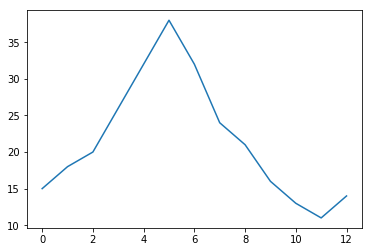

In [2]:
#import numpy
import numpy as np 
#create the marks array 
coffee = np.array([15,18,20,26,32,38,32,24,21,16,13,11,14])
print(coffee.mean(), coffee.std())
#let us see the data distribution by plotting it
import matplotlib.pyplot as pyplot
#plt.plot(range(13),coffee)
pyplot.plot(range(13),coffee)

22.166666666666668 8.081185281600439


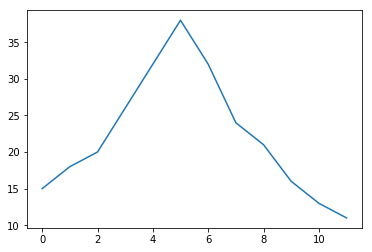

In [3]:
#import numpy
import numpy as np 
#create the marks array 
coffee = np.array([15,18,20,26,32,38,32,24,21,16,13,11])
#import scipy stats
from scipy import stats
#find the zscore
print(coffee.mean(), coffee.std())
#let us see the data distribution by plotting it
import matplotlib.pyplot as pyplot
#plt.plot(range(12),coffee)
pyplot.plot(range(12),coffee)

In [4]:
#import numpy
import numpy as np
from scipy import stats
#create the numpy array consisting of frequency of people going to gym and frequency of smoking  
obs = np.array([[7,1,3],[87,18,84],[12,3,4],[9,1,7]])
#since we are lookingfor only p values, ignore the rest
_,p,_,_ = stats.chi2_contingency(obs)
#print p
p

0.48284216946545633

# scipy.optimize 

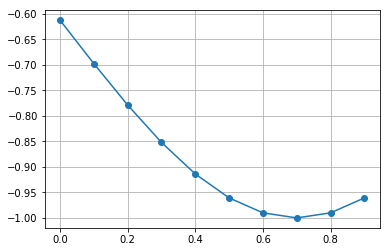

In [5]:
#generate one function and plot with matplotlib
#import matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np
x= np.arange(0.0,1.0,0.1)
#create function
def f(x):
    return -np.exp(-(x-0.7)**2)
#plot function
plt.plot(x,f(x),'o-')
plt.grid()

In [6]:
#find at which x value we get the minimum function
from scipy import optimize
#generating the function
import numpy as np
def f(x):
    return -np.exp(-(x-0.7)**2)
#find the minimum of the function
result = optimize .minimize_scalar(f)
#now find the corresponding x value
x_min = result.x
#print the x value
x_min

0.6999999997839409

# scipy.integrate 

In [8]:
#import scipy integrate
import scipy.integrate as intg
#create one function to find the integration
def integrad(x):
    return x**2
#apply quad() function, get only the answer, ignore rest
ans,_ = intg.quad(integrad,0,1)
#print ans
ans

0.33333333333333337

# scipy.linalg

Determinant of a square matrix

In [9]:
#import scipy linalg package
from scipy import linalg
#import numpy to the square matrix
import numpy as np
data = np.array([[1,2,3],[3,4,5],[5,6,7]])
#find determinant 
linalg.det(data)

-1.1842378929335004e-15

Inverse of a square matrix

In [10]:
#import scipy linalg package
from scipy import linalg
#import numpy to the square matrix
import numpy as np
data = np.array([[1,2,3],[3,4,5],[5,6,7]])
#find determinant 
linalg.inv(data)

array([[-1.18515780e+15,  2.37031559e+15, -1.18515780e+15],
       [ 2.37031559e+15, -4.74063119e+15,  2.37031559e+15],
       [-1.18515780e+15,  2.37031559e+15, -1.18515780e+15]])

Eigen values of a square matrix

In [11]:
#import scipy linalg package
from scipy import linalg
#import numpy to the square matrix
import numpy as np
data = np.array([[1,2,3],[3,4,5],[5,6,7]])
#find determinant 
linalg.eigvals(data)

array([ 1.29282032e+01+0.j, -9.28203230e-01+0.j,  6.16237757e-16+0.j])

# scipy.fftpack

Create one noisy signal

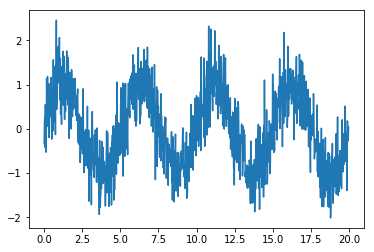

In [12]:
#craete noisy signal
import matplotlib.pyplot as plt
import numpy as np
#create a signal with time_step=0.02
time_step = 0.02
period = 5
time_vec= np.arange(0,20, time_step)
sig = np.sin(2*np.pi/period*time_vec)+ 0.5*np.random.randn(time_vec.size)
plt.plot(time_vec,sig)
plt.show()

Apply fft

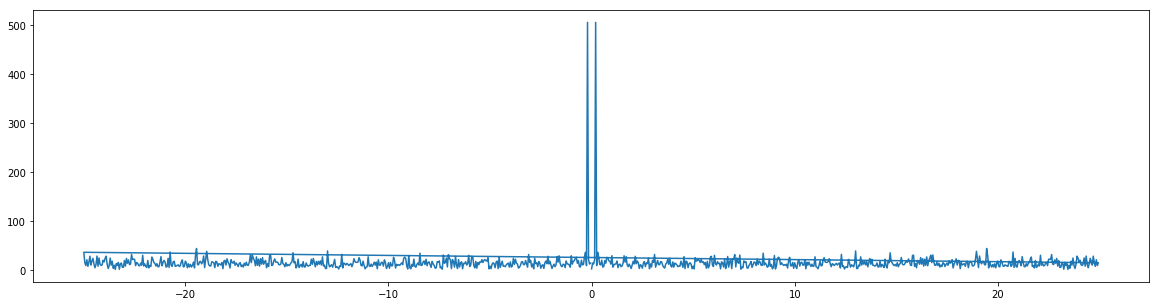

In [13]:
from scipy import fftpack
#Since we didnt not know the signal frequency, we only knew the sampling time step of the signal sig.
#The function fftfreq() returns the FFT sample frequency points.
sample_freq = fftpack.fftfreq(sig.size, d = time_step)
#now apply the fft() in the signal to find the discrete fourier transform
sig_fft = fftpack.fft(sig)
#Calculate the absolute value element-wise
power = np.abs(sig_fft)
plt.figure(figsize=(20,5))
#plot the absolute values of each sample_freq
plt.plot(sample_freq, power)
plt.show()
#here at sample_freq = 0.2 and -0.2 we have absolute values of 5.15943859e+02 = 515.9438593147901 
#print(sample_freq)
#print(power)

Apply inverse fft to get the filtered signal

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


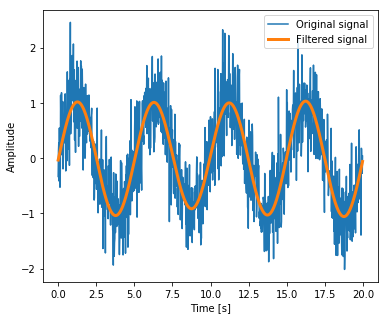

In [14]:
#Filter out the sample frequencies that are greater than 0 with numpy.where(condition) 
pos_mask = np.where(sample_freq > 0)
#Apply the fiter on smaple_freq and store the +ve sample_freq on freqs 
freqs = sample_freq[pos_mask]

#print(power[pos_mask].argmax())
#Find the peak frequency, here we focus on only the positive frequencies
peak_freq = freqs[power[pos_mask].argmax()]
#now get an array copy of the signal where we already applied fft.
high_freq_fft = sig_fft.copy()
#assign the ones greater than peak freq as 0 in order to remove the noise
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0

#print(high_freq_fft)
#Now apply inverese fft on the new high_freq_fft this will be the filtered signal
filtered_sig = fftpack.ifft(high_freq_fft)
#plot 
plt.figure(figsize=(6, 5))
#now plot the original signal for reference
plt.plot(time_vec, sig, label='Original signal')
#now plot the filtered signal
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
#add label, legend
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
#show
plt.show()

# scipy.signal

Resampling

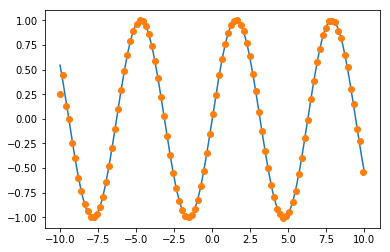

In [15]:
#scipy.signal uses FFT to resample a 1D signal.
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#Now let us create a signal with 200 data point
t = np.linspace(-10, 10, 200) #Defining Time Interval
y = np.sin(t)                         
x_resampled=signal.resample(y, 100) #Number of required samples is 100
plt.plot(t, y)
#for x axis slice t into 2 step size
plt.plot(t[::2], x_resampled, 'o') 
plt.show()

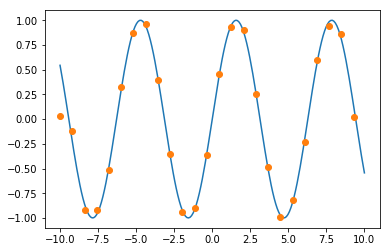

In [16]:
import numpy as np
t = np.linspace(-10, 10, 200)
x = np.sin(t)
from scipy import signal
x_resampled = signal.resample(x, 25) # Number of required samples is 25
plt.plot(t, x) 
plt.plot(t[::8], x_resampled, 'o')
plt.show()